# 4. Wstępne przetwarzanie danych

Przed przystąpieniem do analizy dane należy odpowiednio przygotować. Rzeczywiste dane moga zawierać błedy wynikające z metody pomiaru lub niepoprawnej akwizycji. Niekóre wartości mogą być niezgodne ze zbiorem danych i naszą wiedzą o domenie problemu. W danych mogą występować brakujące wartości lub powtórzenia tych samych pomiarów. Niektóre metody analizy wymagają też odpowiedniego przygotowania danych, np. wykonanie standaryzacji lub zamianę ciągłych wartości na dyskretne (dyskretyzacja) lub dyskretnych - na ciągłe.

## Dane Iris

Dane Iris zawierają pomiary rozmiarów płatków (petal) oraz rozmiarów liści kielicha (sepal) dokonanych dla 3 odmian Irysów: Setosa, Virginica i Versicolor

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="drawing" width="400"/>

Dane można porać z adresu https://www.is.umk.pl/~grochu/wdm/files/iris-data.csv lub z katalogu z danymi w reposytorium ``dane/iris-data.csv``


In [ ]:
import pandas as pd

iris = pd.read_csv('https://www.is.umk.pl/~grochu/wdm/files/iris-data.csv')

print('Ilość przypadków = %d' % (iris.shape[0]))
print('Ilość zmiennych = %d' % (iris.shape[1]))
iris.head()        # wyswielimy pięc pierwszch wierszy

## Brakujące wartości

Na pierwszy rzut oka wszystko wydaje się być w porządku. Niemniej jednak pierwsze co powiniśmy sprawdzić to to czy w pliku nie ma braków danych. W tabeli Pandas takie wartości są reprezentowane za pomocą wartości `null`. Sprawdzmy, czy mamy takie dane w pliku za pomocą metody `isnull()`

In [ ]:
iris.isnull().values.any()

Wygląda na to, że w danych są brakujące wartości. Sprawdzmy ile ich jest w każdej ze zmiennych.

In [ ]:
iris.isnull().sum()

Zobaczmy także jakiego typu są zmienne.

In [ ]:
iris.info()

Pierwsza zmienna powinna zawierać wartości numeryczne a jest reprezentowana jako `object`. Naprawdopodobniej w pliku występuje pewna wartość, która nie jest liczbą, dlatego Pandas zaimportował te wartości do typu `object` (w postaci napisów). Spróbujmy zamienić tą zmienną na zmienną nymeryczną za pomocą metody `to_numeric()`. Argument  `errors='coerce'` sprawia, że  wszystkie problematyczne wartości zostaną zamienione na NaN.

In [ ]:
sepal_numeric = pd.to_numeric(iris['sepal_length_cm'], errors='coerce')

print('Typ zmiennej: %s' % sepal_numeric.dtype)

print(sepal_numeric)

import numpy as np
np.where(sepal_numeric.isna() == True)    # indeksy brakujących wartości 

NameError: ignored

Spradzmy, co było problemem. 

In [ ]:
print(iris.sepal_length_cm[sepal_numeric.isna()])

NameError: ignored

Okazuje się, że dwie wartości w pliku zamiast liczby zawierały znak zapytania (`?`).

Wstawmy poprawioną zmienną we właściwe miejsce w danych.

In [ ]:
iris.sepal_length_cm = sepal_numeric
iris.info()

## Uzupełnianie wartości brakujących

Jeżeli zależy nam na zachowaniu pomiarów zawierających braki to możemy spróbować wypełnic je odpowiednimi wartościami, np. takimi, które wadają się najbardziej pradopodobne, tj. wartością średnią zmiennej lub wartością modalną. 

In [ ]:
iris.sepal_length_cm = iris['sepal_length_cm'].fillna(sepal_numeric.mean())

iris.sepal_length_cm.isna().values.any()

NameError: ignored

## Usuwanie wartości brakujących 

Jednak najczęściej będziemy chcieli się pozbyć pomiarów posiadających brakujące dane. W przypadku, gdy danych jest dostatecznie dużo nie będzie to miało istotnego wpływu na wynik analizy. 

Usuńmy przypadki, które posiadają braki za pomocą metody `dropna()`.


In [ ]:
print("Obecnie w danych jest %d przypadków" % iris.shape[0])

iris = iris.dropna()     # usuwanie wierszy zawierających wartości NaN

print("Po usunięciu braków pozostało %d przypadków" %  iris.shape[0])

## Wartości odstające i inna anomalie


Wypiszmy podstawowe statystyki o danych i sprawdzmy czy występują tam inne anomalie.

In [ ]:
iris.describe()

Dzieki tego typu tabelkom możemy sprawdzić podstawowe informacje o danych oraz sprawdzić czy pomiary  nie przekraczają rozsądnych przedziałów dla poszczególnych cech.

Cecha `sepal_length_cm` posiada podejrzanie małą wartość minimalną (0.055 cm), zaź wartość minimalna zmiennej `sepal_width_cm` jest ujemna (-1.0). Szerokość i wysokość powinny być wartościami większymi od 0. Najprawdopodobniej jest to wartość błędna i ten pomiar należy usunąć.


Wartości odstające najwygodniej wykryć za pomocą wykresu skrzynkowego. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.boxplot(data=iris)

NameError: ignored

Skrzynia określa zakres od 1 do 3 kwartyla z kreską środkową oznaczjąca medianę (wartość środkowa). Punkty leżące za "wąsami" są podejrzane, są to wartości odstające, nietypowe dla rozkładu. 

Potwierdza się, że dwie pierwsze zmienne posiadają odstające wartości. 

Przypadki odstające tj. takie które znajdują się poza zakresem w które wpada większość danych, nie muszą jednoznacznie być błędne. Niemniej jednak należy im się dobrze przyjrzeć. I bardzo rzadko możemy jednoznacznie stwierdzić, czy taka wartość odstająca była błędem pomiaru, błędem na poziomie akwizycji czy też wprowadzania danych, czy może faktycznie jest odstępstwem od normy w samym fenomenie, który obserwujemy. 


Zobaczmy najpierw, które przypadki posiadają wartość ujemną, gdyż one z pewnością są błędne.

In [ ]:
iris[iris['sepal_width_cm'] < 0.0]

Jest jeden taki przypadek - usuńmy go.

In [ ]:
iris = iris[iris['sepal_width_cm'] > 0.0]

Badając rozkład danych przyjrzyjmy się również rozkładowi danych dla każdej pary zmiennych.   
Grupy przypadków zaznaczmy różnymi kolorami.

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.pairplot(iris, hue='class')
plt.show()

Z tego wykresu możemy wysnuć od razu następujące wnioski:
- wartości odstające w zmiennej `sepal_length_cm` są bardzo wyraźnie widoczne i dotyczą odmiany Iris-Versicolor,
- domeana klasy (`class`) ma 5 unikalnych wartości, podczas gdy powinna mieć ich 3.

Zbadajmy najpierw zmienną `class`. Jest to zmienna kategoryczna.

In [ ]:
# wypiszmy jakie posiaday unikalne wartośći w kolumnie class
print(iris['class'].unique())

iris['class'].value_counts()

Możemy zauważyć, że musiał nastąpić błąd w kodowaniu danych, podczas wprowadzania danych zostały wykonane dwie literówki. Poprawmy to.

In [ ]:
iris.loc[iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

# podoby efekt osiągniemy z pomoca metody replace()
iris.loc[:, 'class'] = iris['class'].replace('Iris-setossa', 'Iris-setosa')

print(iris['class'].unique())
print(iris['class'].value_counts())

## Błędy w danych

Przyjrzyjmy się też danym w zmiennej  `sepal_length_cm` odmiany `Iris-versicolor`, które posiadają podejrzanie małe wartości, mniejsze od 2.5cm 

In [ ]:
#dla ułatwienia najpier zapiszę sobie indeks do wykrajania dla tych danych
broken_slice_idx = (iris['class'] == 'Iris-versicolor') & (iris['sepal_length_cm'] < 1.0)

iris.loc[broken_slice_idx]

Możemy wrócić, do tabeli ze statysykami i zauważyć, że wartość `sepal_length_cm` wynosiła średnio 5.6 + 1.3. 

In [ ]:
print("%.1f +- %.1f" % (iris.sepal_length_cm.mean() , iris.sepal_length_cm.std()))

Wygląda na to że podczas wprowadzania danych zostały pomylone jednostki miary, dane zostały wprowadzone w milimetrach zamiast w cm. Oczywiście to należałoby w jakiś sposób potwierdzić, ale na ten moment zmienmy jednostki dla tych danych.

In [ ]:
iris.loc[broken_slice_idx, 'sepal_length_cm'] *= 100.0

In [ ]:
sb.boxplot(data=iris)
sb.pairplot(iris, hue='class')
plt.show()

## Duplikaty



Dane mogą zawierać powtarzające się pomiary, np. w wyniku nieuwagi pomiary jednego obiektu mogły zostać kilkukrotnie wpisane do bazy danych. W przypadku danych Irys nie mamy pewności, czy powtarzające się dane są wynikami uzyskanymi dla  róznych kwiatów. Spróbujmy jednak poszukać powtarzających się wierszy i je usunąć.

Wypiszmy najpierw wszystkie wiersze, które się duplikują.

In [ ]:
iris_d = iris.duplicated(keep=False)

iris[iris_d]

Argument `keep='first'` metody `duplicated()` pozostawia pierwsze wystąpienie powtarzającego się wiersza i pozwala zaindeksować pozostałe duplikaty. Usuńmy wszytkie (oprócz pierwszewgo) powtarzające się pomiary.

In [ ]:
iris_d = iris.duplicated(keep='first')
print('Ilość powtarzających się przypadkóws = %d' % (iris_d.sum()))

print('Liczba przypadków przed selekcją = %d' % (iris.shape[0]))
iris = iris.drop_duplicates()
print('Liczba przypadków po odrzuceniu powtarzających się przypadków  = %d' % (iris.shape[0]))

## Standaryzacja danych

Standaryzacja  - normalizacja zmiennych zamieniająca średnią $\mu$ na 0 (centrowanie) a odchylenie standardowe $\sigma$ na 1

$$
z=\frac{x-\mu}{\sigma}
$$

In [ ]:
iris_num = iris.select_dtypes(include=np.number)

iris_std = (iris_num - iris_num.mean()) / iris_num.std()

iris_std.plot(kind='box')
# pd.options.display.float_format = '{:,.2f}'.format
iris_std.describe()


In [ ]:
# dane odstające leżaca dalej niż 3 odchylenia standardowe
outliers = ((iris_std > 3) | (iris_std < -3)).any(axis=1)

iris[outliers]

## Normalizacja

Normaliacja wartości zmiennych w ustalonym zakresie, zawzyczaj $[-1, 1]$

$$
z= 2 \frac{x - x_{min}}{x_{max}-x_{min}} - 1
$$



In [ ]:
iris_norm = 2 * (iris_num - iris_num.min()) / (iris_num.max() - iris_num.min()) - 1

iris_norm.plot(kind='box')
iris_norm.describe()

## Próbkowanie (sampling)

In [ ]:
sample = iris.sample(n=10) # wybieramy losowo 10 próbek
sample

In [ ]:
sample = iris.sample(frac=0.05, random_state=13) # wybieramy losowo 5% próbek z całego zbioru
sample

In [ ]:
sample = iris.sample(frac=0.05, replace=True, random_state=13) # wybieramy losowo 5% próbek, ale ta sama próbka może być wybrana wiele razy
sample

## Dyskretyzacja danych

Zamiana zmiennych ciągłych na dyskretne

In [ ]:
iris.columns

In [ ]:
iris['sepal_length_cm'].hist(bins=10)               # podział zbioru na 10 elementów

In [ ]:
bins = pd.cut(iris['sepal_length_cm'], 3)   # podział zbioru na 3 elementy o równych odstępach (mniej-więcej)

bins.value_counts(sort=False)

In [ ]:
bins = pd.qcut(iris['sepal_length_cm'], 4, labels=['a', 'b', 'c', 'd']) # podział zbioru na 4 elementy po równo w każdym (mniej-więcej)
bins.value_counts(sort=False)

In [ ]:
iris['sepal_length_size'] = pd.cut(iris['sepal_length_cm'], 3, labels=['small', 'medium', 'large'])
iris.groupby(iris['sepal_length_size']).mean()

## Zamiana kategorycznych danych na zmienne numeryczne
### Kodowanie one-hot

Kodowanie *one-hot* - zamiana wartości kategorycznych na wektor binarny $[0, 0, 1, 0, \ldots, 0]$


In [ ]:
class_one_hot = pd.get_dummies(iris['class'])
class_one_hot

### Mapowanie wartości kategorycznych na liczby

In [ ]:
size_map = {
    'small' : 1,
    'medium' : 2,
    'large' : 3
}

size_data = iris['sepal_length_size'].map(size_map)
size_data

## Zadanie

Wczytaj dane "Breast Cancer Wisconsin" i przeprowadź preprocesing zgodnie z podanymi poniżej wytycznymi.

Adres danech: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

Dane zawierają wartości opisujące cechy jąder komórkowych obecnych na obrazie uzyskanym przy badaniu piersi dla dwóch grup badanaych: `benign` (złożliwy), `malignat` (łagodny).

Oto lista zmiennych:

```
   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

```

Wszystkie istotne cechy posiadają wartości numeryczne, ostatnia zmienna zawiera informacje o 2 klasach.

1. Wczytaj zbiór danych używając Pandas spod adresu https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data. Dane są w formacie zgodnym z CSV (wartości oddzielone przecinkami). Zwróć uwagę na to, że plik nie posiada nagłowka. Dodaj nazwy zmiennych (kolumn) zgodne z listą podanych wyżej artybutów.

In [ ]:
import pandas as pd

tab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
tab.columns =['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

print(tab)

     Sample_code_number  Clump_Thickness  ...  Mitoses  Class
0               1002945                5  ...        1      2
1               1015425                3  ...        1      2
2               1016277                6  ...        1      2
3               1017023                4  ...        1      2
4               1017122                8  ...        1      4
..                  ...              ...  ...      ...    ...
693              776715                3  ...        1      2
694              841769                2  ...        1      2
695              888820                5  ...        2      4
696              897471                4  ...        1      4
697              897471                4  ...        1      4

[698 rows x 11 columns]


2. Pierwsza zmienna zawiera liczbę porządkową (ID), unikatową dla każdego badanego. Jest ona nieistotna dla analizy - usuń ją ze zbioru.

In [ ]:
tab.drop('Sample_code_number', inplace=True, axis=1)

print(tab)

     Clump_Thickness  Uniformity_of_Cell_Size  ...  Mitoses  Class
0                  5                        4  ...        1      2
1                  3                        1  ...        1      2
2                  6                        8  ...        1      2
3                  4                        1  ...        1      2
4                  8                       10  ...        1      4
..               ...                      ...  ...      ...    ...
693                3                        1  ...        1      2
694                2                        1  ...        1      2
695                5                       10  ...        2      4
696                4                        8  ...        1      4
697                4                        8  ...        1      4

[698 rows x 10 columns]


3. Wartości brakujące w pliku kodowane są za pomocą znaku zapytania (`?`). Sprawdź dla ilu badanych występują braki i w których zmiennych się pojawiają. Zastąp wartości brakujące wartością modalną (zob. funkcja [mode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)). Wszystkie cechy (oprócz klasy) powinny być zmiennymi numerycznymi.

In [ ]:
import numpy as np 

tab_numeric1 = pd.to_numeric(tab['Clump_Thickness'], errors='coerce')
tab_numeric2 = pd.to_numeric(tab['Uniformity_of_Cell_Size'], errors='coerce')
tab_numeric3 = pd.to_numeric(tab['Uniformity_of_Cell_Shape'], errors='coerce')
tab_numeric4 = pd.to_numeric(tab['Marginal_Adhesion'], errors='coerce')
tab_numeric5 = pd.to_numeric(tab['Single_Epithelial_Cell_Size'], errors='coerce')
tab_numeric6 = pd.to_numeric(tab['Bare_Nuclei'], errors='coerce')
tab_numeric7 = pd.to_numeric(tab['Bland_Chromatin'], errors='coerce')
tab_numeric8 = pd.to_numeric(tab['Normal_Nucleoli'], errors='coerce')
tab_numeric9 = pd.to_numeric(tab['Mitoses'], errors='coerce')
tab_numeric10 = pd.to_numeric(tab['Class'], errors='coerce')

print(np.where(tab_numeric6.isna() == True))

print(tab.Bare_Nuclei[tab_numeric6.isna()])

tab['Bare_Nuclei'] = tab['Bare_Nuclei'].fillna(tab['Bare_Nuclei'].mode())

tab.isna().values.any()





(array([ 22,  39, 138, 144, 157, 163, 234, 248, 274, 291, 293, 296, 314,
       320, 410, 616]),)
22     ?
39     ?
138    ?
144    ?
157    ?
163    ?
234    ?
248    ?
274    ?
291    ?
293    ?
296    ?
314    ?
320    ?
410    ?
616    ?
Name: Bare_Nuclei, dtype: object


False

4. Sprawdź, czy zbiór danych zawiera przypadki odstające lub nietypowe. Spodzewamy się, że wszystkie zmienne mają wartości od 1 do 10.

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


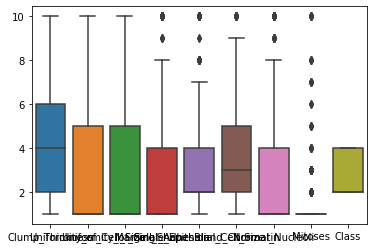

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.boxplot(data=tab)
tab.describe()

tab[~(tab['Clump_Thickness'] > 1.0) & ~(tab['Clump_Thickness'] < 10)]

#(tab < 10) & (tab > 1)




5. Usuń ze zbioru przypadki odstające, których wartości zmiennych leżą poza przedziałem $(\bar{x}-3\cdot\sigma, \bar{x}+ 3\cdot\sigma)$, gdzie $\bar{x}$ to wartość średnia cechy, $\sigma$ to odchyenie standardowe.

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
692,3,1,1,1,2,1,2,1,2,2
693,3,1,1,1,3,2,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


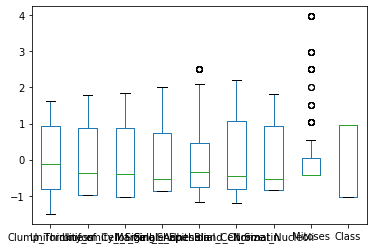

In [ ]:
tab_num = tab.select_dtypes(include=np.number)

tab_std = (tab_num - tab_num.mean()) / tab_num.std()

tab_std.plot(kind='box')
tab_std.describe()

out = ((tab_std > tab.mean() + 3) | (tab_std < tab.mean() - 3)).any(axis = 1)

tab[out]

6. Sprawdź czy dane zawierją powtarzające się pomiary i usuń ze zbioru danych duplikaty.

In [ ]:
tab_d = tab.duplicated(keep='first')
print('Ilość powtarzających się przypadkóws = %d' % (tab_d.sum()))

print('Liczba przypadków przed selekcją = %d' % (tab.shape[0]))
tab = tab.drop_duplicates()
print('Liczba przypadków po odrzuceniu powtarzających się przypadków  = %d' % (tab.shape[0]))



Ilość powtarzających się przypadkóws = 235
Liczba przypadków przed selekcją = 698
Liczba przypadków po odrzuceniu powtarzających się przypadków  = 463
